# A Feedforward Neural Network

This document shows the implementation of a feedforward neural network made using the network module.

## Structure

The neural network which we will construct will have an input layer of 784 neurons, a hidden layer of 128 neurons using rectified linear units, and an output layer of 10 neurons using softmax. In order to avoid saturation in the softmax layer, cross entropy will be used for calculating the loss.

## Loading the Data

We start by loading our training and test data using built in functions for the MNIST database.

In [1]:
from network import mnist_image_file
from network import mnist_label_file

test_images = mnist_image_file("t10k-images.idx3-ubyte")
test_labels = mnist_label_file("t10k-labels.idx1-ubyte")

train_images = mnist_image_file("train-images.idx3-ubyte")
train_labels = mnist_label_file("train-labels.idx1-ubyte")

With the training and test data successfully loaded, we preview the first four images below.

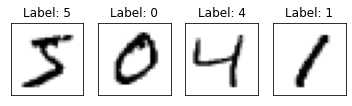

In [2]:
from matplotlib import pyplot as plt

def plot_image(image, label):
    plt.title(f"Label: {label}")
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
    plt.imshow(image, cmap='gray_r')

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plot_image(train_images[i], train_labels[i])

We now format our data to be used by the neural network. The 28x28 pixel images are flattened into 784 dimensional vectors, and their labels are one-hot encoded into 10 dimensional vectors.

In [3]:
import numpy as np

def images_to_vectors(images):
    number_of_images, rows, columns = images.shape
    number_of_pixels = rows * columns
    return images.reshape((number_of_images, number_of_pixels)) / 255.0

def labels_to_vectors(labels):
    vectors = np.zeros((len(labels), 10))
    vectors[np.arange(len(labels)), labels] = 1.0
    return vectors

test_input_vectors = images_to_vectors(test_images)
test_output_vectors = labels_to_vectors(test_labels)

train_input_vectors = images_to_vectors(train_images)
train_output_vectors = labels_to_vectors(train_labels)

## Constructing the Neural Network

With our data loaded and preprocessed, we now initialize the neural network with the structure described above.

In [4]:
from network import FeedforwardNeuralNetwork
from network import AffineTransformationLayer
from network import ReluLayer
from network import SoftmaxLayer
from network import CrossEntropy

input_size = train_input_vectors.shape[1]
output_size = train_output_vectors.shape[1]

network = FeedforwardNeuralNetwork(
    AffineTransformationLayer(input_size, 128),
    ReluLayer(128),
    AffineTransformationLayer(128, output_size),
    SoftmaxLayer(output_size),
    cost=CrossEntropy(output_size)
)

## Training the Neural Network

Finally, we begin training the network using mini-batch gradient descent with a batch-size of 30 for 8 epochs.

In [5]:
def accuracy(input_vectors, output_vectors):
    actual = np.argmax(output_vectors, axis=1)
    predicted = np.argmax(network.feedforward(input_vectors), axis=1)
    return np.sum(np.equal(actual, predicted)) / len(input_vectors)

number_of_train_vectors = train_input_vectors.shape[0]
number_of_epochs = 8
batch_size = 30

for epoch in range(number_of_epochs):
    train_error = 1.0 - accuracy(train_input_vectors, train_output_vectors)
    test_error = 1.0 - accuracy(test_input_vectors, test_output_vectors)
    print(f"start of epoch {epoch}:")
    print(f"train_error = {train_error:.5f}, test_error = {test_error:.5f}")
    
    permutation = np.arange(number_of_train_vectors)
    np.random.shuffle(permutation)
    
    for i in range(0, number_of_train_vectors, batch_size):
        j = min(i + batch_size, number_of_train_vectors)
        indices = permutation[np.arange(i, j)]
        input_vector_batch = train_input_vectors[indices]
        output_vector_batch = train_output_vectors[indices]
        activations = network.activations(input_vector_batch)
        network.backpropagate(activations, output_vector_batch, learning_rate=0.1)

train_error = 1.0 - accuracy(train_input_vectors, train_output_vectors)
test_error = 1.0 - accuracy(test_input_vectors, test_output_vectors)
print(f"training complete:")
print(f"train_error = {train_error:.5f}, test_error = {test_error:.5f}")

start of epoch 0:
train_error = 0.88908, test_error = 0.88930
start of epoch 1:
train_error = 0.05408, test_error = 0.05490
start of epoch 2:
train_error = 0.03218, test_error = 0.03610
start of epoch 3:
train_error = 0.02453, test_error = 0.03000
start of epoch 4:
train_error = 0.01813, test_error = 0.02740
start of epoch 5:
train_error = 0.01373, test_error = 0.02430
start of epoch 6:
train_error = 0.01260, test_error = 0.02410
start of epoch 7:
train_error = 0.01172, test_error = 0.02560
training complete:
train_error = 0.00848, test_error = 0.02260


Two examples, one of a correctly labeled image and one of an incorrectly labeled image, are shown below.

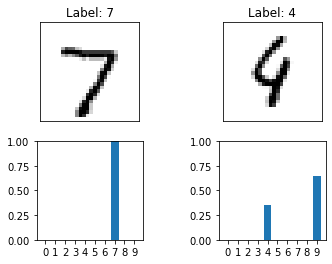

In [6]:
def plot_bar(output_vector_hat):
    plt.bar([str(i) for i in range(10)], output_vector_hat)
    plt.gca().set_ylim([0.0, 1.0])
    plt.gca().set_aspect(10.0)

number_of_test_vectors = test_input_vectors.shape[0]

for i in range(number_of_test_vectors):
    input_vector = test_input_vectors[i]
    output_vector = test_output_vectors[i]
    output_vector_hat = network.feedforward(np.array([input_vector]))[0]
    if np.argmax(output_vector) == np.argmax(output_vector_hat):
        plt.subplot(2, 2, 1)
        plot_image(test_images[i], test_labels[i])
        plt.subplot(2, 2, 3)
        plot_bar(output_vector_hat)
        break

for i in range(number_of_test_vectors):
    input_vector = test_input_vectors[i]
    output_vector = test_output_vectors[i]
    output_vector_hat = network.feedforward(np.array([input_vector]))[0]
    if np.argmax(output_vector) != np.argmax(output_vector_hat):
        plt.subplot(2, 2, 2)
        plot_image(test_images[i], test_labels[i])
        plt.subplot(2, 2, 4)
        plot_bar(output_vector_hat)
        break